In [1]:
import h5py
import scipy.interpolate as sc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Open the data file obtained from the MERRA satellite
file = h5py.File('MERRA2_400.tavgM_2d_chm_Nx.202006.nc4')

In [3]:
# Read the carbon monoxide and latitude/longitude data into numpy arrays
lat = np.array(file['lat'])
lon = np.array(file['lon'])
data = np.array(file['COEM'][0])
print('Shapes of the arrays - lat:{}, lon:{}, data:{}'.format(lat.shape, lon.shape, data.shape))

Shapes of the arrays - lat:(361,), lon:(576,), data:(361, 576)


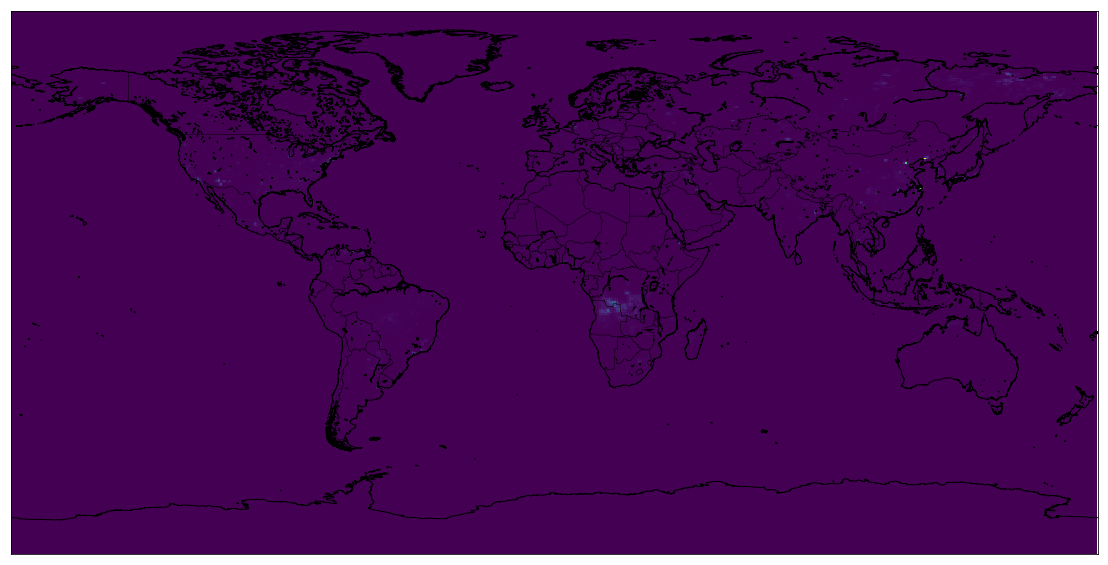

In [4]:
# Plot the data on the world map
plt.figure(figsize=(30, 10))
worldmap = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90, resolution = 'i')
worldmap.drawcountries()
worldmap.drawcoastlines()
worldmap.pcolormesh(lon, lat, data)
plt.show()

In [77]:
# Filter out the data for Africa
africa_lat_indices = np.argwhere((lat < 40) & (lat > -40)) # Latitude bounds for Africa
africa_lon_indices = np.argwhere((lon < 60) & (lon > -20)) # Longitude bounds for Africa
africa_lat = lat[africa_lat_indices.ravel()]
africa_lon = lon[africa_lon_indices.ravel()]
africa_data = data[np.ix_(africa_lat_indices.ravel(), africa_lon_indices.ravel())]

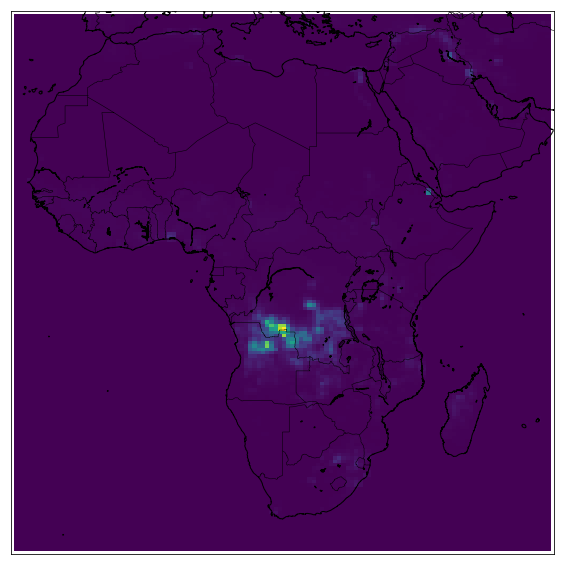

In [78]:
# Plot the data on map centered on Africa
plt.figure(figsize=(30, 10))
africamap = Basemap(llcrnrlon=-20,llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40, resolution = 'i')
africamap.drawcountries()
africamap.drawcoastlines()
africamap.pcolormesh(africa_lon, africa_lat, africa_data)
plt.show()